In [1]:
import numpy as np
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OneHotEncoder, scale, LabelEncoder

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization, LSTM
from tensorflow.keras.layers import Conv1D, MaxPool2D
from tensorflow.keras.optimizers import Adam

In [2]:
df = pd.read_csv('./data/pamap2.csv', index_col=0)

df

,timestamp,activityID,heartrate,handTemperature,handAcc16_1,handAcc16_2,handAcc16_3,handAcc6_1,handAcc6_2,handAcc6_3,...,ankleGyro2,ankleGyro3,ankleMagne1,ankleMagne2,ankleMagne3,ankleOrientation1,ankleOrientation2,ankleOrientation3,ankleOrientation4,subject_id
2932,37.70,1,100.0,30.3750,2.301060,7.25857,6.09259,2.207200,7.24042,5.95555,...,-0.048878,-0.006328,-60.2040,-37.1225,-57.8847,1.000000,0.000000,0.000000,0.000000,1
2943,37.81,1,100.0,30.3750,2.246150,7.48180,5.55219,2.251300,7.40595,5.65313,...,-0.017912,0.015243,-60.7820,-36.2116,-58.4891,1.000000,0.000000,0.000000,0.000000,1
2954,37.92,1,100.0,30.3750,2.300000,7.10681,6.09309,2.346130,7.46611,6.12103,...,-0.011798,0.011387,-61.4531,-36.2983,-58.4845,1.000000,0.000000,0.000000,0.000000,1
2965,38.03,1,100.0,30.3750,2.494550,7.52335,6.17157,2.591060,7.76653,6.27112,...,-0.009233,0.005823,-62.0065,-36.7217,-58.3608,1.000000,0.000000,0.000000,0.000000,1
2976,38.14,1,101.0,30.3750,2.716540,8.30596,4.78671,2.595960,7.94641,4.86635,...,-0.042562,-0.009289,-60.4311,-37.5412,-59.0013,1.000000,0.000000,0.000000,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818402,3629.66,5,195.0,30.8125,0.565086,2.59595,9.27677,0.660681,2.70904,9.44024,...,-0.002287,-0.017737,-17.6912,12.0079,26.5782,0.164776,0.798149,0.227263,0.533065,8
2818413,3629.77,5,195.0,30.8125,0.570697,2.82459,9.39155,0.495537,2.75557,9.47051,...,-0.007246,0.007512,-17.6928,12.0076,26.4364,0.166393,0.797223,0.228965,0.533221,8
2818423,3629.87,5,195.0,30.8125,0.756704,2.78452,9.31749,0.781122,2.72325,9.40988,...,0.003818,0.017649,-17.9459,11.7619,26.1521,0.166735,0.797039,0.229771,0.533041,8
2818435,3629.99,5,195.0,30.8125,0.530504,2.67279,9.35297,0.540382,2.87591,9.30409,...,-0.003649,-0.002610,-18.2103,12.4200,26.5759,0.168936,0.795763,0.231222,0.533628,8


In [3]:
from sklearn.preprocessing import StandardScaler

X = df[['chestAcc16_1', 'chestAcc16_2',  'chestAcc16_3',   
    'chestAcc6_1',  'chestAcc6_2',  'chestAcc6_3',
    'chestGyro1',   'chestGyro2',   'chestGyro3',    
    'chestMagne1', 'chestMagne2' , 'chestMagne3']]
y= df['activityID']

scaler = StandardScaler()
X = scaler.fit_transform(X)

scaled_X = pd.DataFrame(data = X, columns = ['chestAcc16_1', 'chestAcc16_2',  'chestAcc16_3',   
    'chestAcc6_1',  'chestAcc6_2',  'chestAcc6_3',
    'chestGyro1',   'chestGyro2',   'chestGyro3',    
    'chestMagne1', 'chestMagne2' , 'chestMagne3'])
scaled_X['label'] = y.values

In [4]:
scaled_X.head(10)

,chestAcc16_1,chestAcc16_2,chestAcc16_3,chestAcc6_1,chestAcc6_2,chestAcc6_3,chestGyro1,chestGyro2,chestGyro3,chestMagne1,chestMagne2,chestMagne3,label
0,-0.113958,0.273971,-0.421864,-0.142715,0.267651,-0.464490,-0.025283,-0.039285,-0.058621,-0.320001,-1.109523,2.088468,1
1,-0.251278,0.274224,-0.405403,-0.161033,0.270759,-0.457645,-0.099793,-0.078221,-0.040138,-0.283493,-1.081785,2.171801,1
2,-0.206551,0.258553,-0.422430,-0.197943,0.280109,-0.464328,-0.049967,-0.108366,-0.076733,-0.288014,-1.116606,2.100712,1
3,-0.157992,0.289696,-0.396142,-0.178895,0.286269,-0.437176,-0.196031,0.015376,0.032507,-0.308281,-1.086287,2.106397,1
4,-0.067844,0.258404,-0.421501,-0.114839,0.248966,-0.434038,-0.006253,-0.014541,-0.123602,-0.223819,-1.136728,2.125185,1
5,-0.182046,0.258635,-0.404884,-0.160989,0.261430,-0.444087,0.019838,-0.019583,0.086809,-0.287337,-1.140714,2.130267,1
6,-0.114321,0.227422,-0.421703,-0.115281,0.249001,-0.461212,-0.223323,-0.040860,0.055358,-0.287517,-1.134701,2.124360,1
7,-0.089635,0.250779,-0.404238,-0.105414,0.261380,-0.437416,0.078540,0.020927,-0.186836,-0.262824,-1.124073,2.172018,1
8,-0.135298,0.235365,-0.395798,-0.068725,0.252049,-0.444321,-0.066442,-0.052849,-0.042083,-0.268748,-1.135776,2.171927,1
9,-0.088247,0.250884,-0.386845,-0.133212,0.252080,-0.430592,-0.071147,-0.035318,-0.409870,-0.198638,-1.137947,2.166927,1


In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(scaled_X, 
                                                    scaled_X["label"],
                                                    test_size = 0.2, 
                                                    shuffle = True, 
                                                    random_state = 21)

In [6]:
X_train

,chestAcc16_1,chestAcc16_2,chestAcc16_3,chestAcc6_1,chestAcc6_2,chestAcc6_3,chestGyro1,chestGyro2,chestGyro3,chestMagne1,chestMagne2,chestMagne3,label
47864,-1.259443,0.275998,-0.299183,-1.360984,0.274634,-0.349682,-0.115885,0.087219,0.977505,-0.447452,-0.168704,0.093025,3
45703,-0.004571,-0.135766,-0.167637,-0.110620,-0.120598,-0.312935,0.813387,0.036522,-0.182503,-0.218321,0.324236,0.153105,2
66679,-1.687104,0.992493,0.060441,-1.877564,0.976093,0.037528,0.890447,-0.443214,0.547464,-0.646052,-0.407979,-0.641881,4
93645,0.269637,0.284191,0.041303,0.281062,0.263616,0.016915,0.127598,0.074803,-0.001394,-0.529221,-0.055618,-0.255106,3
84311,-0.185712,-0.003467,-0.134555,-0.216343,-0.021440,-0.108576,0.245193,0.532761,0.609806,0.967096,-0.877427,0.336519,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
81968,-0.260364,0.534808,0.323670,0.005065,0.549010,0.334336,0.202508,1.330027,0.416138,-1.692382,-0.613033,0.632263,13
8964,1.067797,0.920625,-1.024613,0.868833,0.847937,-0.899677,-1.087877,0.277972,-0.324634,0.195007,-2.204789,-0.012171,13
71480,-1.633195,3.371578,-0.373490,-1.129080,2.108845,-0.164339,4.335919,-1.687328,-1.468581,-0.641531,-0.525093,-0.403074,5
70863,-0.330014,-0.157019,0.099683,-0.272756,-0.263813,0.114973,-0.875911,0.298594,-0.123644,0.425319,-0.440682,1.113609,7


In [7]:
y_train

47864     3
45703     2
66679     4
93645     3
84311     4
         ..
81968    13
8964     13
71480     5
70863     7
80841    13
Name: label, Length: 94812, dtype: int64

In [8]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((94812, 13), (23704, 13), (94812,), (23704,))

In [9]:
TIME_STEPS = 40
STEP = 10

In [10]:
from scipy import stats

def create_dataset(X, y, time_steps, step):
    Xs, ys = [], []
    for i in range(0, len(X) - time_steps, step):
        v = X.iloc[i:(i + time_steps)].values
        labels = y.iloc[i: i + time_steps]
        Xs.append(v)        
        ys.append(stats.mode(labels)[0][0])
    return np.array(Xs), np.array(ys).reshape(-1, 1)


X_train, y_train = create_dataset(X_train[['chestAcc16_1', 'chestAcc16_2',  'chestAcc16_3',   
    'chestAcc6_1',  'chestAcc6_2',  'chestAcc6_3',
    'chestGyro1',   'chestGyro2',   'chestGyro3',    
    'chestMagne1', 'chestMagne2' , 'chestMagne3']], X_train.label, TIME_STEPS, STEP)

X_test, y_test = create_dataset(X_test[['chestAcc16_1', 'chestAcc16_2',  'chestAcc16_3',   
    'chestAcc6_1',  'chestAcc6_2',  'chestAcc6_3',
    'chestGyro1',   'chestGyro2',   'chestGyro3',    
    'chestMagne1', 'chestMagne2' , 'chestMagne3']], X_test.label, TIME_STEPS, STEP)

print(X_train.shape, y_train.shape)

C:\Users\adminastor\AppData\Local\Temp\ipykernel_10112\183538770.py:9: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  ys.append(stats.mode(labels)[0][0])
C:\Users\adminastor\AppData\Local\Temp\ipykernel_10112\183538770.py:9: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warni

(9478, 40, 12) (9478, 1)


In [11]:
X_train

array([[[-1.25944321e+00,  2.75998488e-01, -2.99183226e-01, ...,
         -4.47451948e-01, -1.68704088e-01,  9.30249176e-02],
        [-4.57125729e-03, -1.35765635e-01, -1.67636640e-01, ...,
         -2.18321142e-01,  3.24235569e-01,  1.53105228e-01],
        [-1.68710420e+00,  9.92493159e-01,  6.04408595e-02, ...,
         -6.46052352e-01, -4.07978650e-01, -6.41880597e-01],
        ...,
        [-2.99832084e-02, -2.52221594e-01, -1.84776816e-01, ...,
         -6.63743960e-01, -2.10944350e-01,  1.61628657e+00],
        [ 8.50597274e-01,  3.14823323e-01,  7.98541079e-02, ...,
         -8.60484539e-01, -1.34143390e-01,  5.19094212e-01],
        [-2.72374962e-01,  2.66650281e-01, -3.79444405e-01, ...,
         -4.25616243e-01, -1.60497412e+00,  8.38247784e-01]],

       [[-5.96069188e-01,  7.03537325e-01, -1.29573447e+00, ...,
          3.99442491e-01,  3.47939504e-01,  1.54948294e+00],
        [ 1.15688040e-01, -5.15454919e-01, -6.98828873e-02, ...,
         -1.94824098e-01, -6.38301703e

In [12]:
y_train

array([[ 3],
       [ 3],
       [ 3],
       ...,
       [ 4],
       [ 4],
       [13]], dtype=int64)

In [13]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown = "ignore", sparse = False)
enc = enc.fit(y_train)

y_train = enc.transform(y_train)
y_test = enc.transform(y_test)

In [14]:
y_train

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [15]:
print("X_train.shape: ", X_train.shape)
print("X_test.shape ", X_test.shape)
print("y_train.shape ", y_train.shape)
print("y_test.shape ", y_test.shape)

X_train.shape:  (9478, 40, 12)
X_test.shape  (2367, 40, 12)
y_train.shape  (9478, 8)
y_test.shape  (2367, 8)


In [16]:
verbose,epochs,batch_size=1,10,32 

n_timesteps,n_features,n_outputs=X_train.shape[1],X_train.shape[2],y_train.shape[1]

In [17]:
n_timesteps, n_features, n_outputs

(40, 12, 8)

In [18]:
model = Sequential()
model.add(LSTM(64, input_shape=[n_timesteps, n_features], return_sequences = True))
model.add(LSTM(128))
model.add(Dropout(0.3))
model.add(Dense(64, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(n_outputs, activation="softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 40, 64)            19712     
                                                                 
 lstm_1 (LSTM)               (None, 128)               98816     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 8)                 520       
                                                                 
Total params: 127,304
Trainable params: 127,304
Non-trai

In [19]:
model.compile(optimizer=Adam(learning_rate = 0.001), loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [20]:
history = model.fit(X_train, y_train, epochs = 10, batch_size = 32, validation_split = 0.1, shuffle = True)

Epoch 1/10
267/267 [==============================] - 14s 40ms/step - loss: 1.6279 - accuracy: 0.3811 - val_loss: 1.4862 - val_accuracy: 0.4546
Epoch 2/10
267/267 [==============================] - 10s 36ms/step - loss: 1.5002 - accuracy: 0.4244 - val_loss: 1.4334 - val_accuracy: 0.4620
Epoch 3/10
267/267 [==============================] - 10s 38ms/step - loss: 1.4561 - accuracy: 0.4336 - val_loss: 1.4197 - val_accuracy: 0.4483
Epoch 4/10
267/267 [==============================] - 11s 40ms/step - loss: 1.4375 - accuracy: 0.4427 - val_loss: 1.4329 - val_accuracy: 0.4451
Epoch 5/10
267/267 [==============================] - 10s 39ms/step - loss: 1.4127 - accuracy: 0.4528 - val_loss: 1.4993 - val_accuracy: 0.4156
Epoch 6/10
267/267 [==============================] - 11s 40ms/step - loss: 1.4035 - accuracy: 0.4522 - val_loss: 1.4182 - val_accuracy: 0.4568
Epoch 7/10
267/267 [==============================] - 11s 40ms/step - loss: 1.3817 - accuracy: 0.4638 - val_loss: 1.3993 - val_accuracy:

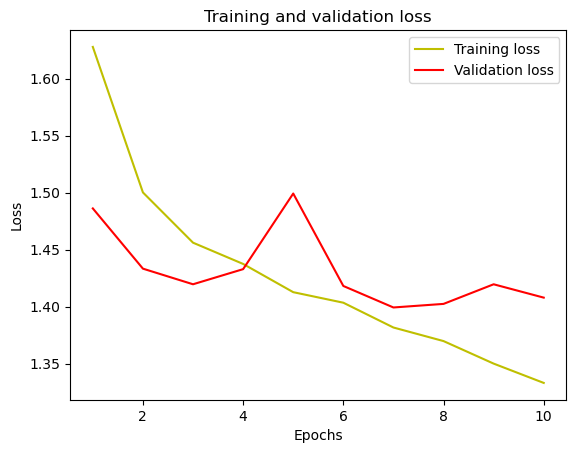

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

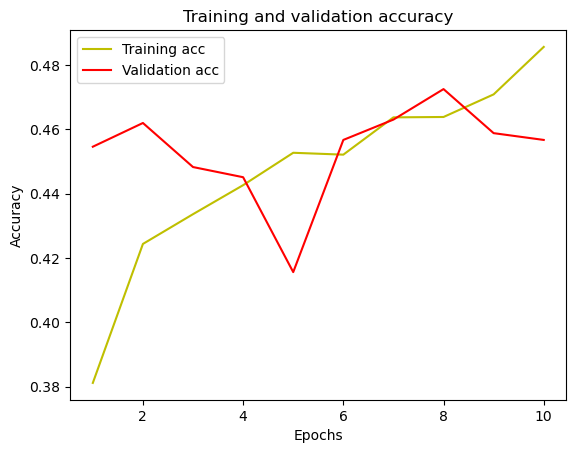

In [22]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [23]:
model.evaluate(X_test, y_test)
y_pred = model.predict(X_test)

74/74 [==============================] - 2s 13ms/step


In [24]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

y_test_arg=np.argmax(y_test,axis=1)
Y_pred = np.argmax(model.predict(X_test),axis=1)
print('Confusion Matrix')
print(confusion_matrix(y_test_arg, Y_pred))

74/74 [==============================] - 1s 14ms/step
Confusion Matrix
[[386  10   1  50   0   0   0   0]
 [ 72 132  51 184   0   0   0   0]
 [ 46  83  74 194   0   0   0   0]
 [135  55  67 494   0   0   0   0]
 [  1   0   0   4   0   0   0   0]
 [ 41  21  14 214   0   0   0   0]
 [  6   3   0   8   0   0   0   0]
 [  4   0   1  16   0   0   0   0]]


In [25]:
print(X_train.shape,y_test.shape)
base_loss,base_accuracy=model.evaluate(X_test, y_test, batch_size=batch_size, verbose=1)

cnn_file='./data/CNN_Model.h5'
  
tf.keras.models.save_model(model, cnn_file, include_optimizer=False)
print('model saved at ', cnn_file)
#score,keras_file=evaluate_model(trainX,trainy,testX,testy)
score=base_accuracy*100
print('Accuracy >{:f}'.format(score))
print('Base Loss >{:.2f}'.format(base_loss))

(9478, 40, 12) (2367, 8)
74/74 [==============================] - 1s 14ms/step - loss: 1.3546 - accuracy: 0.4588
model saved at  ./data/CNN_Model.h5
Accuracy >45.880863
Base Loss >1.35


## Tuning

In [26]:
# Base 모델을 로드

base_model = keras.models.load_model(cnn_file)

In [27]:
print("Number of layers in the base model: ", len(base_model.layers))

# Fine-tune from this layer onwards
fine_tune_at = 5

# Freeze all the layers before the `fine_tune_at` layer
for layer in base_model.layers[:fine_tune_at]:
  layer.trainable =  False

new_model = keras.models.Sequential(base_model.layers[:-1])
new_model.add(keras.layers.Dense(8, activation='sigmoid'))

new_model.compile(loss="categorical_crossentropy",
                     optimizer=keras.optimizers.Adam(lr=1e-3),
                     metrics=["accuracy"])

Number of layers in the base model:  6


C:\Users\adminastor\anaconda3\envs\homl3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [28]:
display_layers = [(layer, layer.name, layer.trainable) for layer in base_model.layers]
pd.DataFrame(display_layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])

,Layer Type,Layer Name,Layer Trainable
0,<keras.layers.rnn.lstm.LSTM object at 0x000001...,lstm,False
1,<keras.layers.rnn.lstm.LSTM object at 0x000001...,lstm_1,False
2,<keras.layers.regularization.dropout.Dropout o...,dropout,False
3,<keras.layers.core.dense.Dense object at 0x000...,dense,False
4,<keras.layers.regularization.dropout.Dropout o...,dropout_1,False
5,<keras.layers.core.dense.Dense object at 0x000...,dense_1,True


In [29]:
history2 = new_model.fit(X_train, y_train, epochs=10, batch_size = 32, validation_split = 0.1, shuffle = True)
new_model.summary()

Epoch 1/10
267/267 [==============================] - 8s 19ms/step - loss: 1.6301 - accuracy: 0.3589 - val_loss: 1.4137 - val_accuracy: 0.4631
Epoch 2/10
267/267 [==============================] - 4s 17ms/step - loss: 1.3746 - accuracy: 0.4621 - val_loss: 1.3840 - val_accuracy: 0.4578
Epoch 3/10
267/267 [==============================] - 4s 17ms/step - loss: 1.3240 - accuracy: 0.4879 - val_loss: 1.3832 - val_accuracy: 0.4599
Epoch 4/10
267/267 [==============================] - 4s 16ms/step - loss: 1.3095 - accuracy: 0.4870 - val_loss: 1.3844 - val_accuracy: 0.4641
Epoch 5/10
267/267 [==============================] - 4s 17ms/step - loss: 1.2923 - accuracy: 0.4987 - val_loss: 1.3866 - val_accuracy: 0.4673
Epoch 6/10
267/267 [==============================] - 4s 16ms/step - loss: 1.2925 - accuracy: 0.4996 - val_loss: 1.3925 - val_accuracy: 0.4610
Epoch 7/10
267/267 [==============================] - 4s 16ms/step - loss: 1.2841 - accuracy: 0.4958 - val_loss: 1.3873 - val_accuracy: 0.4557

## 미세조정

In [30]:
base_model.trainable = True
new_model.compile(loss="categorical_crossentropy",
                     optimizer=keras.optimizers.Adam(lr=1e-3),
                     metrics=["accuracy"])

C:\Users\adminastor\anaconda3\envs\homl3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [31]:
display_layers = [(layer, layer.name, layer.trainable) for layer in base_model.layers]
pd.DataFrame(display_layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])

,Layer Type,Layer Name,Layer Trainable
0,<keras.layers.rnn.lstm.LSTM object at 0x000001...,lstm,True
1,<keras.layers.rnn.lstm.LSTM object at 0x000001...,lstm_1,True
2,<keras.layers.regularization.dropout.Dropout o...,dropout,True
3,<keras.layers.core.dense.Dense object at 0x000...,dense,True
4,<keras.layers.regularization.dropout.Dropout o...,dropout_1,True
5,<keras.layers.core.dense.Dense object at 0x000...,dense_1,True


In [32]:
history2 = new_model.fit(X_train, y_train, epochs=10, batch_size = 32, validation_split = 0.1, shuffle = True)
new_model.summary()

Epoch 1/10
267/267 [==============================] - 14s 41ms/step - loss: 1.3053 - accuracy: 0.4937 - val_loss: 1.4664 - val_accuracy: 0.4473
Epoch 2/10
267/267 [==============================] - 11s 41ms/step - loss: 1.2887 - accuracy: 0.4991 - val_loss: 1.3879 - val_accuracy: 0.4821
Epoch 3/10
267/267 [==============================] - 10s 39ms/step - loss: 1.2683 - accuracy: 0.5111 - val_loss: 1.4178 - val_accuracy: 0.4747
Epoch 4/10
267/267 [==============================] - 11s 41ms/step - loss: 1.2565 - accuracy: 0.5145 - val_loss: 1.4365 - val_accuracy: 0.4705
Epoch 5/10
267/267 [==============================] - 11s 40ms/step - loss: 1.2340 - accuracy: 0.5203 - val_loss: 1.4176 - val_accuracy: 0.4641
Epoch 6/10
267/267 [==============================] - 11s 41ms/step - loss: 1.2184 - accuracy: 0.5275 - val_loss: 1.4630 - val_accuracy: 0.4810
Epoch 7/10
267/267 [==============================] - 11s 41ms/step - loss: 1.1884 - accuracy: 0.5400 - val_loss: 1.5000 - val_accuracy:

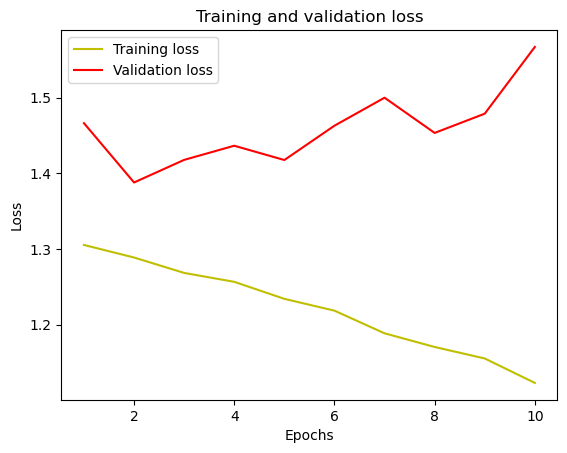

In [33]:
loss = history2.history['loss']
val_loss = history2.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

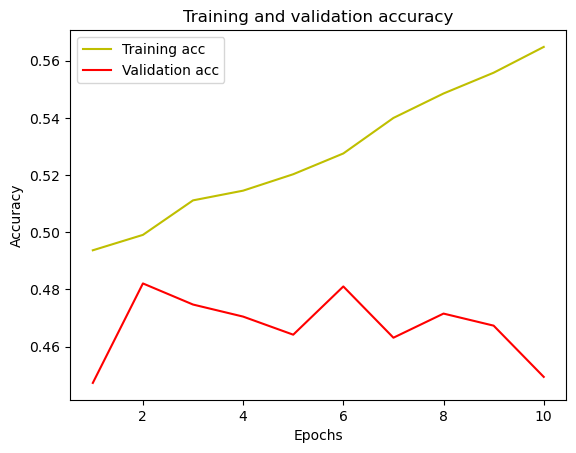

In [34]:
acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [35]:
new_model.evaluate(X_test, y_test)
y_pred = new_model.predict(X_test)

74/74 [==============================] - 2s 22ms/step
